In [238]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [239]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [240]:
root_paths=[
    '../results/sw/sw_SINRv11_default_NeuralODE_no_exp_diagonal_default',
    '../results/sw/sw_CAE_h32_k5_ReZero_default_none_none',
    '../results/sw/sw_SINRv11_default_NeuralODE_no_exp_none_none',
    '../results/sw/sw_AEflow_b4_k5_ReZero_default_none_none',
    '../results/sw/sw_SINRv11_default_NeuralODE_no_exp_scalar_default',
    # '../results/sw/sw_SINRv11_default_NeuralODE_no_exp_cholesky_reg0',
    # '../results/sw/sw_SINRv11_default_NeuralODE_no_exp_cholesky_reg1',
    # '../results/sw/sw_SINRv11_default_NeuralODE_no_exp_cholesky_reg1e-1',
    # '../results/sw/sw_SINRv11_default_NeuralODE_no_exp_cholesky_reg1e1',
]

In [241]:

import glob

df = pd.concat(
    [
    pd.concat(
        [pd.read_pickle(f) 
         for f in glob.glob(root_path + "/*dataframe.pkl")],
        ignore_index=True)
    for root_path in root_paths
],
    ignore_index=True)
df

,kf_name,step,feature_idx,rmse,ed_name,ld_name,ue_name,ens_num,infl,sigma_z_b,sigma_m
0,EnKF,0,0,0.019871,SINRv11_default,NeuralODE_no_exp,diagonal_default,32,1.10,NaN,NaN
1,EnKF,0,1,0.076270,SINRv11_default,NeuralODE_no_exp,diagonal_default,32,1.10,NaN,NaN
2,EnKF,1,0,0.019258,SINRv11_default,NeuralODE_no_exp,diagonal_default,32,1.10,NaN,NaN
3,EnKF,1,1,0.072533,SINRv11_default,NeuralODE_no_exp,diagonal_default,32,1.10,NaN,NaN
4,EnKF,2,0,0.019965,SINRv11_default,NeuralODE_no_exp,diagonal_default,32,1.10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1028825,ETKF-Q,196,1,0.112261,SINRv11_default,NeuralODE_no_exp,scalar_default,32,1.02,0.1,NaN
1028826,ETKF-Q,197,0,0.047254,SINRv11_default,NeuralODE_no_exp,scalar_default,32,1.02,0.1,NaN
1028827,ETKF-Q,197,1,0.112841,SINRv11_default,NeuralODE_no_exp,scalar_default,32,1.02,0.1,NaN
1028828,ETKF-Q,198,0,0.047769,SINRv11_default,NeuralODE_no_exp,scalar_default,32,1.02,0.1,NaN


# Renaming

In [242]:
df[df == 'CAE_h32_k5'] = 'CAE'
df[df == 'AEflow_b4_k5'] = 'AEflow'
df[df == 'SINRv11_default'] = 'SINR'

df[df == 'ReZero_default'] = '+ReZero'
df[df == 'NeuralODE_no_exp'] = '+NeuralODE'
df[df == 'none_none'] = ''
df[df == 'diagonal_default'] = '+diagonal'
df[df == 'scalar_default'] = '+scalar'

In [243]:
df['model'] = df['ed_name'] + df['ld_name'] + df['ue_name']

# df['model'] = df['ed_name'] + '+' + df['ld_name'] + '+' + df['ue_name']
# df[df == 'CAE+ReZero+none'] = 'CAE+ReZero'
# df[df == 'SINR+NeuralODE+none'] = 'SINR+NeuralODE (LAINR, ours)'
# df[df == 'SINR+NeuralODE+diagonal'] = 'SINR+NeuralODE w/ est. (LAINR, ours)'
df.drop(columns=['ed_name', 'ld_name', 'ue_name'], inplace=True)
print('#trajs:', len(df) / 199 / 2)
df

#trajs: 2585.0


,kf_name,step,feature_idx,rmse,ens_num,infl,sigma_z_b,sigma_m,model
0,EnKF,0,0,0.019871,32,1.10,NaN,NaN,SINR+NeuralODE+diagonal
1,EnKF,0,1,0.076270,32,1.10,NaN,NaN,SINR+NeuralODE+diagonal
2,EnKF,1,0,0.019258,32,1.10,NaN,NaN,SINR+NeuralODE+diagonal
3,EnKF,1,1,0.072533,32,1.10,NaN,NaN,SINR+NeuralODE+diagonal
4,EnKF,2,0,0.019965,32,1.10,NaN,NaN,SINR+NeuralODE+diagonal
...,...,...,...,...,...,...,...,...,...
1028825,ETKF-Q,196,1,0.112261,32,1.02,0.1,NaN,SINR+NeuralODE+scalar
1028826,ETKF-Q,197,0,0.047254,32,1.02,0.1,NaN,SINR+NeuralODE+scalar
1028827,ETKF-Q,197,1,0.112841,32,1.02,0.1,NaN,SINR+NeuralODE+scalar
1028828,ETKF-Q,198,0,0.047769,32,1.02,0.1,NaN,SINR+NeuralODE+scalar


In [244]:
df['sigma_z_b'].fillna(-1, inplace=True)
df['sigma_m'].fillna(-1, inplace=True)
df_grouped = df.groupby(['ens_num', 'model', 'infl', 'sigma_z_b', 'sigma_m', 'kf_name'])['rmse'].mean()
print('trajs:', len(df) / 199 / 2)
print(f'{len(df_grouped)=}')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_grouped)
# df

trajs: 2585.0
len(df_grouped)=1980
ens_num  model                    infl  sigma_z_b  sigma_m  kf_name
32       AEflow+ReZero            1.02   0.01       0.0001  DEnKF      0.297491
                                                            ETKF       0.336677
                                                            ETKF-Q     0.330428
                                                            EnKF       0.314786
                                                            SEnKF      0.385574
                                                    0.0003  DEnKF      0.295116
                                                            ETKF       0.335315
                                                            ETKF-Q     0.328406
                                                            EnKF       0.306818
                                                            SEnKF      0.385594
                                                    0.0010  DEnKF      0.296837
                 

In [245]:
df_avg_rmse = df_grouped.reset_index()
with pd.option_context('display.max_rows', 30, 'display.max_columns', None):
    display(df_avg_rmse)


,ens_num,model,infl,sigma_z_b,sigma_m,kf_name,rmse
0,32,AEflow+ReZero,1.02,0.01,0.0001,DEnKF,0.297491
1,32,AEflow+ReZero,1.02,0.01,0.0001,ETKF,0.336677
2,32,AEflow+ReZero,1.02,0.01,0.0001,ETKF-Q,0.330428
3,32,AEflow+ReZero,1.02,0.01,0.0001,EnKF,0.314786
4,32,AEflow+ReZero,1.02,0.01,0.0001,SEnKF,0.385574
...,...,...,...,...,...,...,...
1975,64,SINR+NeuralODE+scalar,1.10,-1.00,-1.0000,DEnKF,0.061360
1976,64,SINR+NeuralODE+scalar,1.10,-1.00,-1.0000,ETKF,0.059900
1977,64,SINR+NeuralODE+scalar,1.10,-1.00,-1.0000,ETKF-Q,0.049649
1978,64,SINR+NeuralODE+scalar,1.10,-1.00,-1.0000,EnKF,0.056890


In [246]:
df_avg_rmse['kf_id'] = df_avg_rmse['kf_name'].map({
    'EnKF': 0,
    'SEnKF': 1,
    'DEnKF': 2,
    'ETKF': 3,
    'ETKF-Q': 4,
})
df_avg_rmse.sort_values(by=['kf_id'], kind='stable', inplace=True)
df_avg_rmse = df_avg_rmse.reset_index(drop=True)
with pd.option_context('display.max_rows', 50, 'display.max_columns', None):
    display(df_avg_rmse)

,ens_num,model,infl,sigma_z_b,sigma_m,kf_name,rmse,kf_id
0,32,AEflow+ReZero,1.02,0.01,0.0001,EnKF,0.314786,0
1,32,AEflow+ReZero,1.02,0.01,0.0003,EnKF,0.306818,0
2,32,AEflow+ReZero,1.02,0.01,0.0010,EnKF,0.309004,0
3,32,AEflow+ReZero,1.02,0.01,0.0030,EnKF,0.342933,0
4,32,AEflow+ReZero,1.02,0.01,0.0100,EnKF,0.333072,0
...,...,...,...,...,...,...,...,...
1975,64,SINR+NeuralODE+diagonal,1.10,-1.00,-1.0000,ETKF-Q,0.052329,4
1976,64,SINR+NeuralODE+scalar,1.02,-1.00,-1.0000,ETKF-Q,0.049120,4
1977,64,SINR+NeuralODE+scalar,1.02,0.10,-1.0000,ETKF-Q,0.052209,4
1978,64,SINR+NeuralODE+scalar,1.05,-1.00,-1.0000,ETKF-Q,0.049236,4


In [247]:
df_avg_rmse[df_avg_rmse['model'] == 'SINR+NeuralODE+scalar'][df['sigma_z_b'] > 0]

/tmp/ipykernel_29342/1433739621.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_avg_rmse[df_avg_rmse['model'] == 'SINR+NeuralODE+scalar'][df['sigma_z_b'] > 0]


,ens_num,model,infl,sigma_z_b,sigma_m,kf_name,rmse,kf_id


In [248]:
for model in df_avg_rmse['model'].unique():
    print(model)
    for column_name in ['kf_name', 'ens_num', 'infl', 'sigma_z_b', 'sigma_m']:
        print(f'\t{column_name}: {df_avg_rmse[df_avg_rmse["model"]==model][column_name].unique()}')


AEflow+ReZero
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32 64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
CAE+ReZero
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32 64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
SINR+NeuralODE
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32 64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
SINR+NeuralODE+diagonal
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32 64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [-1.   0.1]
	sigma_m: [-1.]
SINR+NeuralODE+scalar
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32 64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [-1.    0.01  0.03  0.1 ]
	sigma_m: [-1.]


In [249]:
df_avg_rmse = df_avg_rmse[df_avg_rmse['ens_num'] == 32]
# df_avg_rmse = df_avg_rmse[df_avg_rmse['infl'] == 1.05]
df_avg_rmse = df_avg_rmse[df_avg_rmse['sigma_m'] < 1e-1]

bar size: 54 | AEflow+ReZero: 0.2862500101702297, DEnKF, sigma_z_b=0.03, sigma_m=0.0003
bar size: 54 | CAE+ReZero: 0.40901603334438263, ETKF, sigma_z_b=0.01, sigma_m=0.003
bar size: 54 | SINR+NeuralODE: 0.05468321888328497, DEnKF, sigma_z_b=0.03, sigma_m=0.0003
bar size: 4 | SINR+NeuralODE+diagonal: 0.05912830744724926, ETKF-Q, sigma_z_b=-1.0, sigma_m=-1.0
bar size: 6 | SINR+NeuralODE+scalar: 0.05583822019585413, ETKF-Q, sigma_z_b=-1.0, sigma_m=-1.0
AEflow+ReZero
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03  ]
CAE+ReZero
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03  ]
SINR+NeuralODE
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.

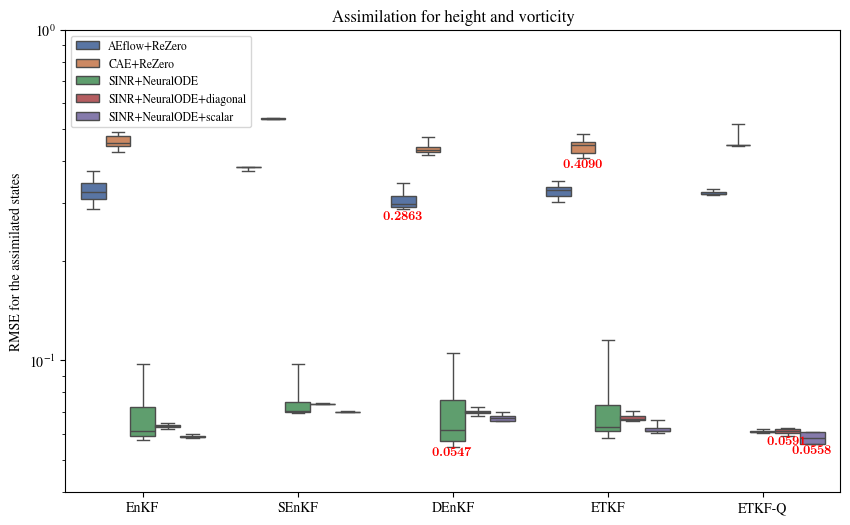

In [250]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.boxplot(df_avg_rmse, x='kf_name', y='rmse',
                 hue='model', palette='deep',
                 whis=(0, 100),
                 ax=ax
                 )

ax.set_yscale('log')
ax.set_ylim(4e-2, 1.)
ax.set_xlabel('')
ax.set_ylabel('RMSE for the assimilated states')
ax.set_title('Assimilation for height and vorticity')
ax.legend(fontsize='small')

# annotate the minimal value for each model
models = df_avg_rmse['model'].unique()
for xoffset, model in zip(np.linspace(-.4 + .4 / len(models), .4 - .4 / len(models), len(models)), models):
    df_model = df_avg_rmse[df_avg_rmse['model'] == model]
    min_idx = df_model['rmse'].argmin()
    min_row = df_model.iloc[min_idx]
    min_value = min_row['rmse']
    x_idx = list(df_model['kf_name'].unique()).index(min_row['kf_name'])
    print('bar size:', len(df_model[df_model['kf_name'] == 'EnKF']), end=' | ')
    print(f'{model}: {min_value}, {min_row["kf_name"]}, sigma_z_b={min_row["sigma_z_b"]}, sigma_m={min_row["sigma_m"]}')
    ax.annotate(r'\small\textbf{' + f'{min_value:.4f}' + r'}',
                xy=(x_idx + xoffset, min_value),
                xytext=(0, -.2),
                textcoords='offset points',
                ha='center', va='top', color='r',
                # weight='bold',
                usetex=True,
                # arrowprops=dict(facecolor='black', shrink=0.05),
                )

plt.savefig('sw_assimilate_boxfig.pdf', bbox_inches='tight')

for model in df_avg_rmse['model'].unique():
    print(model)
    for column_name in ['kf_name', 'ens_num', 'infl', 'sigma_z_b', 'sigma_m']:
        print(f'\t{column_name}: {df_avg_rmse[df_avg_rmse["model"]==model][column_name].unique()}')

bar size: 54 | CAE+ReZero: 0.40901603334438263, ETKF, sigma_z_b=0.01, sigma_m=0.003
bar size: 54 | AEflow+ReZero: 0.2862500101702297, DEnKF, sigma_z_b=0.03, sigma_m=0.0003
bar size: 54 | SINR+NeuralODE: 0.05468321888328497, DEnKF, sigma_z_b=0.03, sigma_m=0.0003


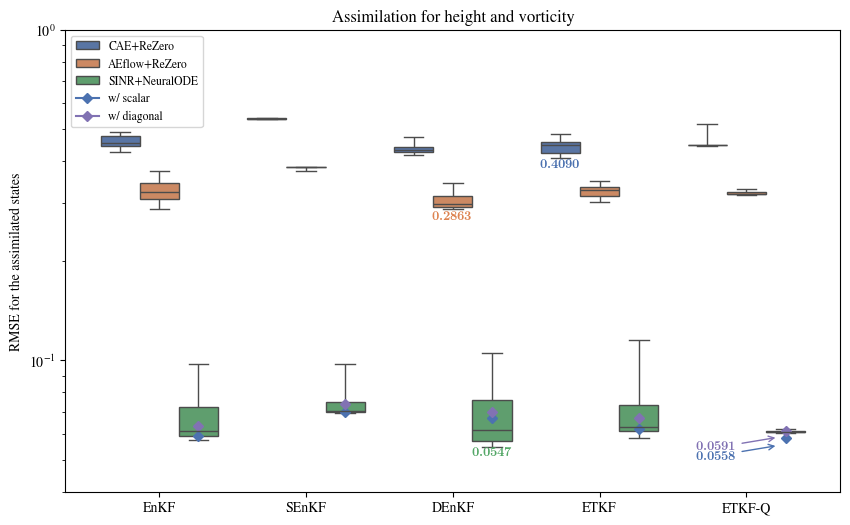

In [251]:
fig, ax = plt.subplots(figsize=(10, 6))

models = 'CAE+ReZero', 'AEflow+ReZero', 'SINR+NeuralODE'

df_plot = pd.concat([
    df_avg_rmse[df_avg_rmse['model'] == 'CAE+ReZero'],
    df_avg_rmse[df_avg_rmse['model'] == 'AEflow+ReZero'],
    df_avg_rmse[df_avg_rmse['model'] == 'SINR+NeuralODE']
])

models_ue = 'SINR+NeuralODE+scalar', 'SINR+NeuralODE+diagonal'


palette_name = 'deep'

ax = sns.boxplot(df_plot, x='kf_name', y='rmse',
                 hue='model', palette=palette_name,
                 whis=(0, 100),
                 ax=ax
                 )

ax.set_yscale('log')
ax.set_ylim(4e-2, 1.)
ax.set_xlabel('')
ax.set_ylabel('RMSE for the assimilated states')
ax.set_title('Assimilation for height and vorticity')

colors = sns.palettes.color_palette(palette_name, len(models) + len(models_ue))

# annotate the minimal value for each model
for k, (xoffset, model) in enumerate(zip([-.8 / 3, 0, .8 / 3], models)):
    df_model = df_avg_rmse[df_avg_rmse['model'] == model]
    min_idx = df_model['rmse'].argmin()
    min_row = df_model.iloc[min_idx]
    min_value = min_row['rmse']
    x_idx = list(df_model['kf_name'].unique()).index(min_row['kf_name'])
    print('bar size:', len(df_model[df_model['kf_name'] == 'EnKF']), end=' | ')
    print(f'{model}: {min_value}, {min_row["kf_name"]}, sigma_z_b={min_row["sigma_z_b"]}, sigma_m={min_row["sigma_m"]}')
    ax.annotate(r'\small\textbf{' + f'{min_value:.4f}' + r'}'                # +f'\n$\\sigma^m={min_row["sigma_m"]}$, $\\sigma_z^b={min_row["sigma_z_b"]}$'
                ,
                xy=(x_idx + xoffset, min_value),
                xytext=(0, -.2),
                textcoords='offset points',
                ha='center', va='top', color=colors[k],
                # weight='bold',
                usetex=True,
                # arrowprops=dict(facecolor='black', shrink=0.05),
                )

for k, model in enumerate(models_ue):
    df_anno = df_avg_rmse[df_avg_rmse['model'] == model]
    # add diagonal estimator
    for xtick in ax.get_xticks():
        # idx = df[df['error']==min_value[xtick]].index.values
        df_anno_value = df_anno[df_anno['kf_name'] == df_plot['kf_name'].unique()[xtick]]['rmse'].mean()
        # ax.text(xtick, low_whisker - 2, text,
        #               horizontalalignment='center', size='x-small', weight='semibold')
        if xtick == 0:
            ax.plot(xtick + .4 - .8 / len(models) / 2, df_anno_value, marker='D',
                    markersize=5, color=colors[-k], label='w/ ' + model.split('+')[-1])
        else:
            ax.plot(xtick + .4 - .8 / len(models) / 2, df_anno_value, marker='D',
                    markersize=5, color=colors[-k])
    # add diagonal estimator minimum
    min_idx = df_anno['rmse'].argmin()
    min_row = df_anno.iloc[min_idx]
    min_value = min_row['rmse']
    min_kf_idx = list(df_anno['kf_name'].unique()).index(min_row['kf_name'])
    ax.annotate(r'\small\textbf{' + f'{min_value:.4f}' + r'}',
                xy=(min_kf_idx + .4 - .8 / len(models) / 2 - .05, min_value * .99),
                xytext=(-30, -3),
                textcoords='offset points',
                arrowprops=dict(arrowstyle="->", color=colors[-k]),
                ha='right', va='top', color=colors[-k],
                # weight='bold',
                usetex=True,
                )


ax.legend(fontsize='small')
plt.savefig('sw_assimilate_boxfig.pdf', bbox_inches='tight')

# deprecated

In [252]:
for column_name in df.columns:
    if column_name in ['ed_name', 'ld_name', 'ue_name', 'rmse']:
        continue
    print(f'{column_name}: {df[column_name].unique()}')

kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
step: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198]
feature_idx: [0 1]
ens_num: [32 64]
infl: [1.1  1.05 1.02]
sigma_z_b: [-1.    0.1   0.01  0.03]
sigma_m: [-1.e+00  1.e-02  1.e-04  3.e-

In [253]:
ax = sns.boxplot(df, x='sigma_m', y='rmse',
                 hue='surrogate model', palette='deep', whis=(0, 100))

ax.set_yscale('log')
ax.set_ylim(4e-2, 1.)
ax.set_xlabel(r'$\sigma^m$', usetex=True)
ax.set_ylabel('RMSE for the assimilated states')

# annotate the minimal value for each model
for xoffset, model in zip([-2, 0, 2], df['surrogate model'].unique()):
    df_model = df[df['surrogate model'] == model]
    min_idx = df_model['rmse'].argmin()
    min_row = df_model.iloc[min_idx]
    min_value = min_row['rmse']
    x_idx = list(df_model['sigma_m'].unique()).index(min_row['sigma_m'])
    print(f'{model}: {min_value}')
    ax.annotate(r'\underline{\textbf{'+f'{min_value:.4f}'+r'}}',
                #+f'\n{min_row["kf_name"]} with $\\sigma_z^b={min_row["sigma_z_b"]:.4f}$',
                xy=(x_idx, min_value),
                xytext=(xoffset, -.2),
                textcoords='offset fontsize',
                ha='center', va='top', color='r',
                # weight='bold',
                usetex=True,
                # arrowprops=dict(facecolor='black', shrink=0.05),
                )

# plt.savefig('sw_assimilate_boxfig.pdf', bbox_inches='tight')

ValueError: Could not interpret value `surrogate model` for `hue`. An entry with this name does not appear in `data`.

In [ ]:
ax = sns.boxplot(df, x='kf_name', y='rmse',
                 hue='surrogate model', palette='deep', whis=(0, 100))

ax.set_yscale('log')
ax.set_ylim(5e-2, 1.)
ax.set_xlabel('')
ax.set_ylabel('RMSE for the assimilated states')
ax.set_title('Assimilation for height and vorticity')
ax.legend(fontsize='small')

# annotate the minimal value for each model
for xoffset, model in zip([-2, 0, 2], df['surrogate model'].unique()):
    df_model = df[df['surrogate model'] == model]
    min_idx = df_model['rmse'].argmin()
    min_row = df_model.iloc[min_idx]
    min_value = min_row['rmse']
    x_idx = list(df_model['kf_name'].unique()).index(min_row['kf_name'])
    print(f'{model}: {min_value}, {min_row["kf_name"]}, sigma_z_b={min_row["sigma_z_b"]}, sigma_m={min_row["sigma_m"]}')
    ax.annotate(r'\textbf{' + f'{min_value:.4f}' + r'}'
                # +f'\n$\\sigma^m={min_row["sigma_m"]}$, $\\sigma_z^b={min_row["sigma_z_b"]}$'
                ,
                xy=(x_idx, min_value),
                xytext=(xoffset, -.2),
                textcoords='offset fontsize',
                ha='center', va='top', color='r',
                # weight='bold',
                usetex=True,
                # arrowprops=dict(facecolor='black', shrink=0.05),
                )

plt.savefig('sw_assimilate_boxfig.pdf', bbox_inches='tight')

In [ ]:
ax = sns.scatterplot(df, x='sigma_m', y='rmse',
                     hue='kf_name', style='surrogate model', palette='deep')
# ax.set_yscale('log')
ax.set_xscale('log')